In [1]:
from glob import glob
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map,plot_map_zoom
import xarray as xr
import matplotlib.pyplot as plt
import pickle
import gzip
import numpy
import netCDF4
import datetime
import os
from typing import Optional, Tuple

FMT = '%Y-%m-%dT%H:%M:%S.%fZ'

In [2]:
time_min = '2010-01-01'                                        # time min for analysis
time_max = '2017-12-31'  

# Grid map 
maps_glorys = xr.open_dataset("/Odyssey/private/t22picar/data/glorys_15m/glorys_multivar_15m_2010-2018.nc").sel(time="2010-01-01")
lon_bins = np.linspace(-180.125, 179.9 + 0.125, 1441)
lat_bins = np.linspace(-80.125, 90.125, 680)

def compute_hist(ds_drifter):

    # Supposons que les variables de longitude et latitude soient nommées 'longitude' et 'latitude'
    longitude = ds_drifter['lon'].values
    latitude = ds_drifter['lat'].values

    # Calculer le nombre de données dans chaque bin 2D
    histogram, lat_edges, lon_edges = np.histogram2d(
        latitude, longitude, bins=[lat_bins, lon_bins]
    )

    # Convertir le résultat en xarray.DataArray pour une manipulation plus facile
    histogram_da = xr.DataArray(
        histogram,
        coords=[('lat_bin', lat_edges[:-1]), ('lon_bin', lon_edges[:-1])],
        dims=['lat_bin', 'lon_bin'])
    
    return(histogram_da)
    

2019

In [ ]:
year=2018
filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
histogram_da = compute_hist(ds_drifter)
plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,cmap=plt.cm.Reds,title="AOML drifters data density 2019",colorbar_title=None)
plt.savefig(f"figures/hist_drifter_aoml_{year}.png")
plt.show()


In [3]:
# Créer un masque pour les valeurs entre -135 et -125
masque_cal = (longitude >= -140) & (longitude <= -120) & (latitude >= 35) & (latitude <= 50)
# Appliquer le masque pour filtrer les valeurs
longitude_filtre = longitude[masque_cal]
latitude_filtre = latitude[masque_cal]

# Calculer le nombre de données dans chaque bin 2D
histogram, lat_edges, lon_edges = np.histogram2d(
    latitude_filtre, longitude_filtre, bins=[lat_bins, lon_bins]
)

# Convertir le résultat en xarray.DataArray pour une manipulation plus facile
histogram_da = xr.DataArray(
    histogram,
    coords=[('lat_bin', lat_edges[:-1]), ('lon_bin', lon_edges[:-1])],
    dims=['lat_bin', 'lon_bin'])

NameError: name 'longitude' is not defined

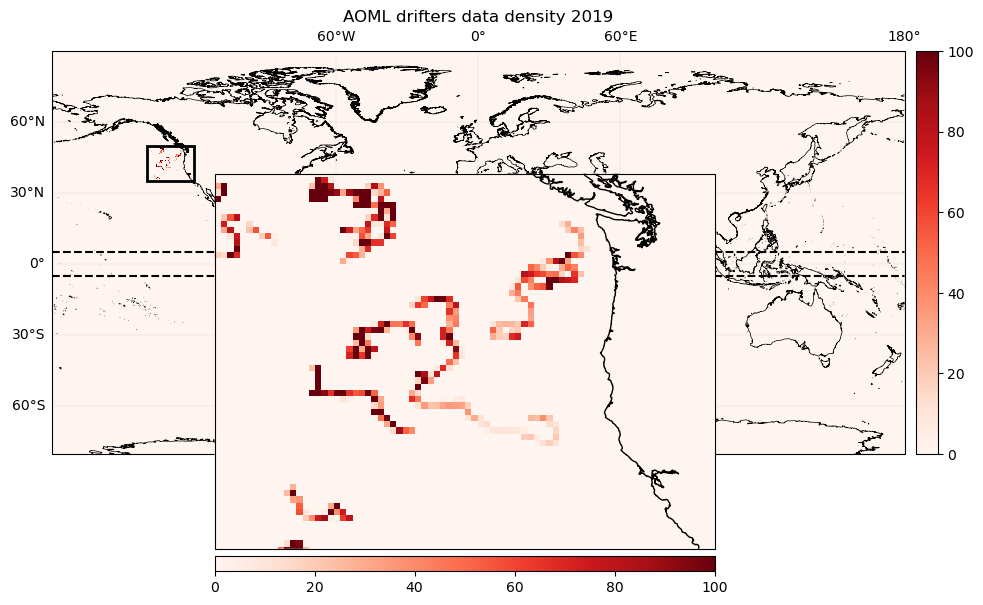

In [29]:
lat_min= 35
lat_max = 50
lon_max = -120
lon_min = -140

zoom_extent=[lon_min,lon_max,lat_min,lat_max]
zoom_ax = [0, 0, 1, 1]

plot_map_zoom(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,cmap=plt.cm.Reds,title="AOML drifters data density 2019",zoom_extent=zoom_extent)

In [3]:
year_start=2010
year_end=2018
filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year_start}.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')

for year in range(year_start+1,year_end+1):
    print(year)
    filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
    ds_drifter_aoml = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
    ds_drifter=xr.concat([ds_drifter_aoml, ds_drifter], dim="date")
    
histogram_da = compute_hist(ds_drifter)


2011
2012
2013
2014
2015
2016
2017
2018


In [4]:
histogram_da.to_netcdf("histogram_da_2010_2018.nc")

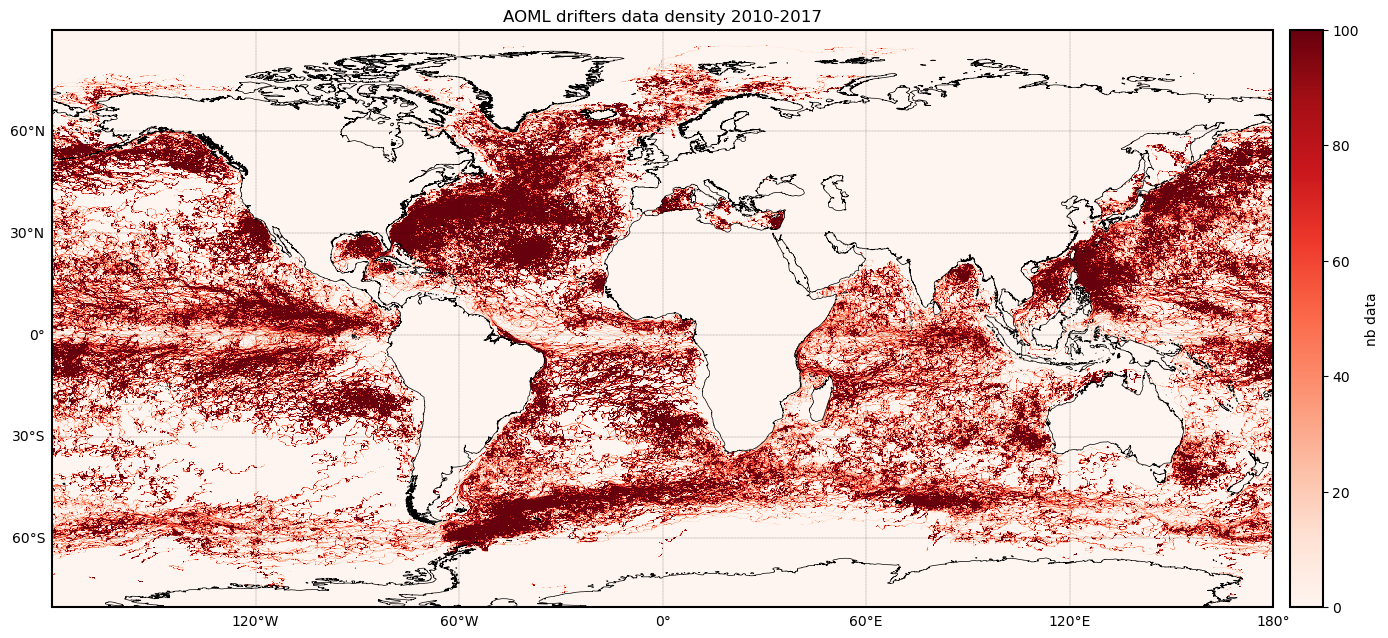

In [28]:
plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,colorbar_title="nb data",cmap=plt.cm.Reds,title=f"AOML drifters data density {year_start}-{year_end}")
plt.savefig(f"figures/hist_drifter_aoml_{year_start}-{year_end}.png")
plt.show()

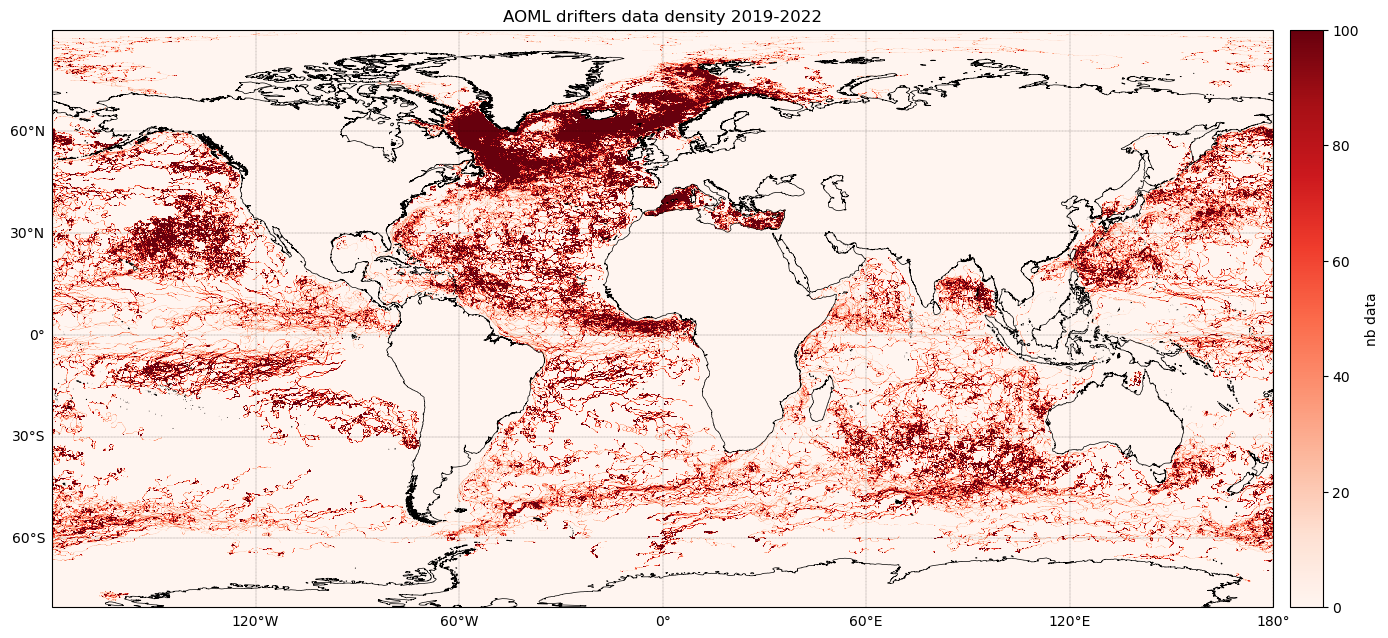

In [31]:
plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,colorbar_title="nb data",cmap=plt.cm.Reds,title="AOML drifters data density 2019-2022")
plt.savefig(f"figures/hist_drifter_aoml_2019-2022.png")
plt.show()

2010-2018

2011
2012
2013
2014
2015
2016
2017
2018


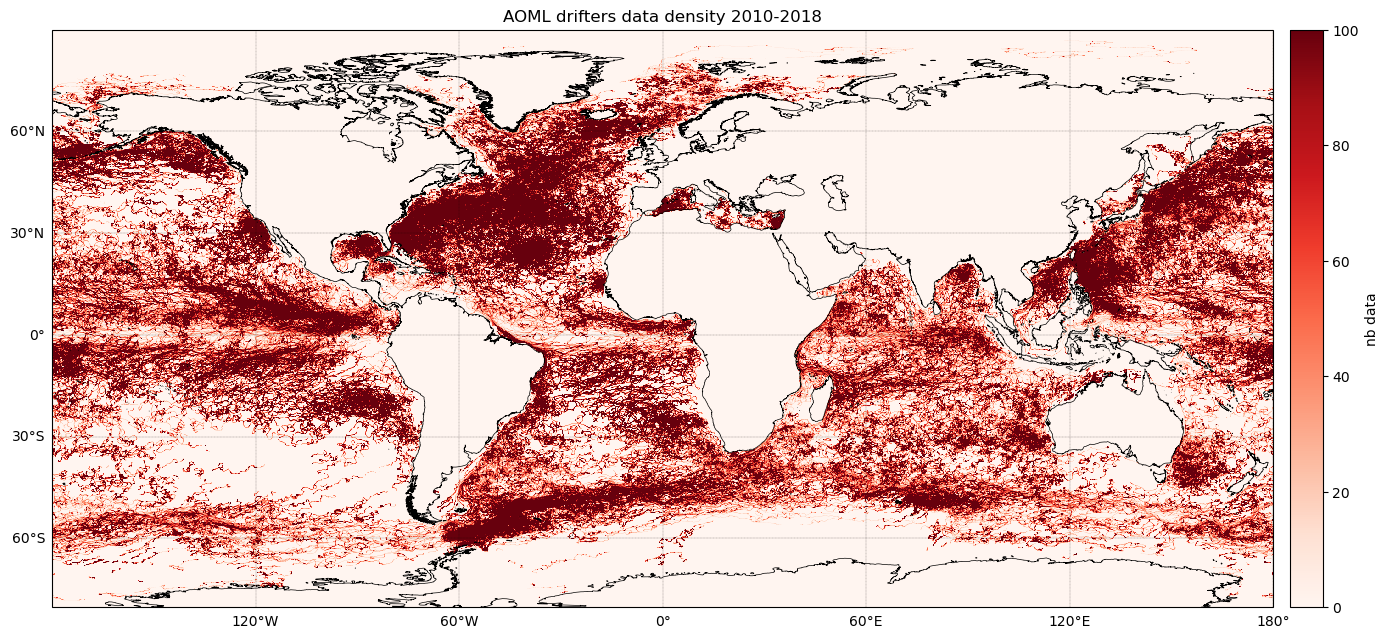

In [37]:
year=2010
filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')

for year in range(2011,2019):
    print(year)
    filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
    ds_drifter_aoml = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
    ds_drifter=xr.concat([ds_drifter_aoml, ds_drifter], dim="date")
    
histogram_da = compute_hist(ds_drifter)
plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,colorbar_title="nb data",cmap=plt.cm.Reds,title="AOML drifters data density 2010-2018")
plt.savefig(f"figures/hist_drifter_aoml_2010-2018.png")
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
import cartopy.feature as cfeature

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams.update({'font.size': 20})
plt.rcParams['axes.labelsize'] = 20  # Taille pour X et Y

box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, -43, 25, 46.5 ]
box_agulhas = [11, 33, -44, -27]
box_NA = [-40, 0, 48, 68]

#list_box = [box_cal,box_med,box_gs,box_agulhas,box_NA]

list_box = [box_cal,box_gs,box_agulhas]
list_box_str = ["CA","GS","AG"]

def plot_map_zoom(var,lon,lat,title=None,vmax=None,vmin=None,colorbar_label=None,axs=None,fig=None,list_box=None,cmap='RdBu_r',lat_mask=None,lognorm=None):

    if not axs:
        fig, axs = plt.subplots(nrows=1,ncols=1,
                            subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(11*1.5,5*1.5))
    
        
    axs.add_feature(
    cfeature.LAND,
    facecolor='lightgray',  # Couleur de remplissage
    edgecolor='black',      # Couleur des bordures (optionnel)
    zorder=2                # Ordre de dessin (0 = en arrière-plan)
    )
        #p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
    #vmax_glob=np.nanmax(var)
    #vmin_glob=np.nanmin(var)
    if lat_mask is not None:
        axs.hlines(lat_mask,-180,180,color='k', alpha=1, linestyle='--')
        axs.hlines(-lat_mask,-180,180,color='k', alpha=1, linestyle='--')

    if lognorm:
        p0 = plt.pcolormesh(lon, lat, var, cmap=cmap,norm=LogNorm(vmin=vmin, vmax=vmax))
    else:  
        p0 = plt.pcolormesh(lon, lat, var, cmap=cmap,vmax=vmax,vmin=vmin)

    if title:
        axs.set_title(title)

    axs.coastlines(resolution='10m', lw=0.5)
    #axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

    # optional add grid lines
    p0.axes.gridlines(color='black', alpha=0., linestyle='--')

    # draw parallels/meridiens and write labels
    gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=0.2, color='black', alpha=0.8, linestyle='--')
    # adjust labels to taste
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True

    gl.xlabel_style = {'size': 20, 'color': 'black'}
    gl.ylabel_style = {'size': 20, 'color': 'black'}

    #get size and extent of axes:
    axpos = axs.get_position()
    pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
    pos_y = axpos.y0
    cax_width = 0.02
    cax_height = axpos.height
    #create new axes where the colorbar should go.
    #it should be next to the original axes and have the same height!
    pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
    cbar=plt.colorbar(p0, cax=pos_cax)
    if colorbar_label:
        cbar.set_label(colorbar_label)
    if list_box:
        i=0
        for zoom_extent in list_box : 
            
            # Ajouter les contours de la zone zoomée sur la carte principale
            zoom_rect = plt.Rectangle((zoom_extent[0], zoom_extent[2]),
                                    zoom_extent[1] - zoom_extent[0],
                                    zoom_extent[3] - zoom_extent[2],
                                    linewidth=2, edgecolor='k', facecolor='none',
                                    transform=ccrs.PlateCarree())
            
            
            axs.add_patch(zoom_rect)
            center_lon = (zoom_extent[0] + zoom_extent[1]) / 2
            axs.text(center_lon, zoom_extent[2] - 10 ,  # Position légèrement au-dessus de la boîte
                    list_box_str[i],  # Texte à afficher
                    transform=ccrs.PlateCarree(),
                    fontsize=20,
                    fontweight='bold',  # Texte en gras
                    bbox=dict(facecolor='white', alpha=0, edgecolor='none'),
                    ha='center', va='bottom')
            i+=1

In [ ]:
year=2018
filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
histogram_da = compute_hist(ds_drifter)
plot_map_zoom(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,cmap=plt.cm.Reds,title=f"AOML drifters data density {year}")
plt.savefig(f"figures/hist_drifter_aoml_{year}.png", dpi = 300)
plt.show()


In [5]:

year=2019
filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
histogram_da = compute_hist(ds_drifter)



In [6]:
histogram_da.to_netcdf("histogram_da_2019.nc")

In [ ]:
box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, -43, 25, 46.5 ]
box_agulhas = [11, 33, -44, -27]
box_NA = [-40, 0, 48, 68]

box_hawai = [-170, -120, 10, 40]
box_canari = [-40, -5, 10, 35]


#list_box = [box_cal,box_med,box_gs,box_agulhas,box_NA]
#list_box = [box_cal,box_gs,box_agulhas]
#list_box_str = ["CA","GS","AG"]

list_box = [box_hawai,box_canari,box_gs,box_agulhas]
list_box_str = ["HW","CN","GS","AG"]

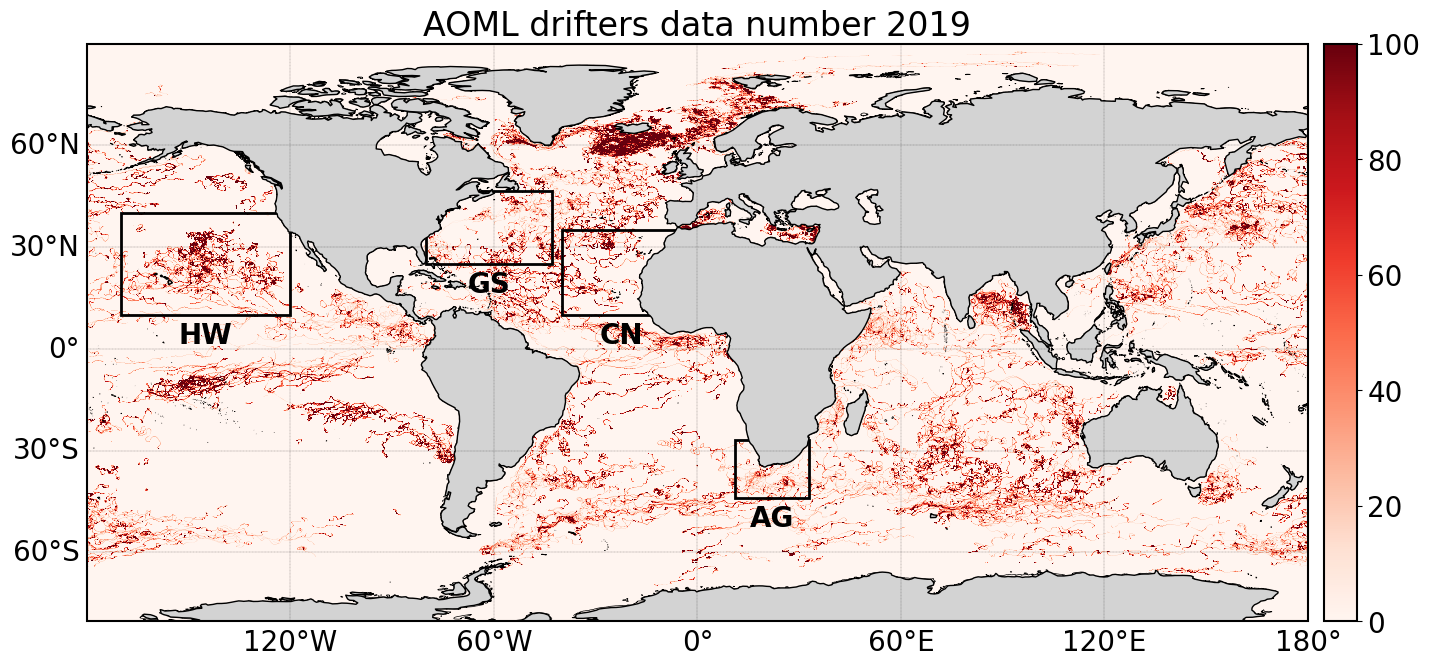

In [ ]:

plot_map_zoom(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,cmap=plt.cm.Reds,title="AOML drifters data number 2019",list_box=list_box)

#plt.savefig(f"../figures/hist_drifter_aoml_2019.png", dpi = 300)
plt.show()

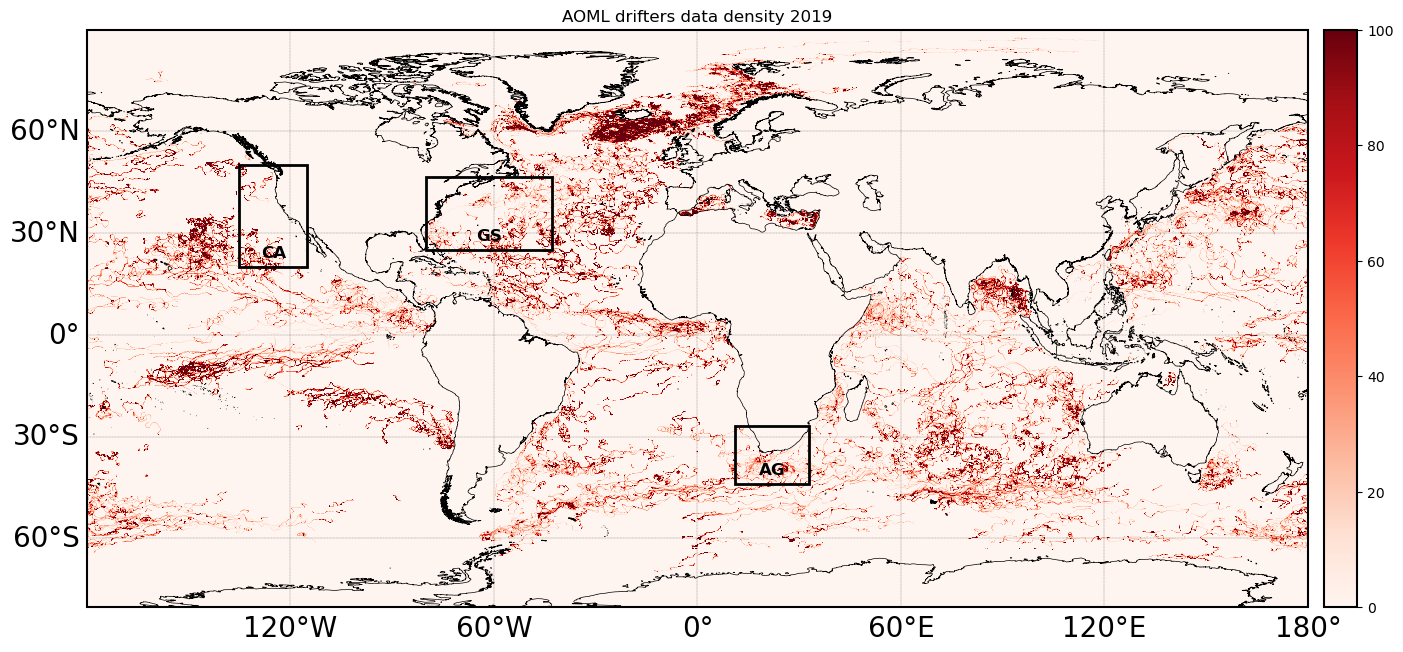

In [27]:
plot_map_zoom(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,cmap=plt.cm.Reds,title="AOML drifters data density 2019",list_box=list_box)


In [ ]:
year=2010
filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
ds_drifter = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')

for year in range(2011,2019):
    print(year)
    filenames_drifters = sorted(glob(f'/Odyssey/public/drifters/aoml/drifter_*_{year}.nc'))
    ds_drifter_aoml = xr.open_mfdataset(filenames_drifters, combine='nested', concat_dim='date')
    ds_drifter=xr.concat([ds_drifter_aoml, ds_drifter], dim="date")
    
histogram_da = compute_hist(ds_drifter)
plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,cmap=plt.cm.Reds,title="AOML drifters data number 2010-2018",list_box=None)
plt.savefig(f"../figures/hist_drifter_aoml_2010-2018.png")
plt.show()

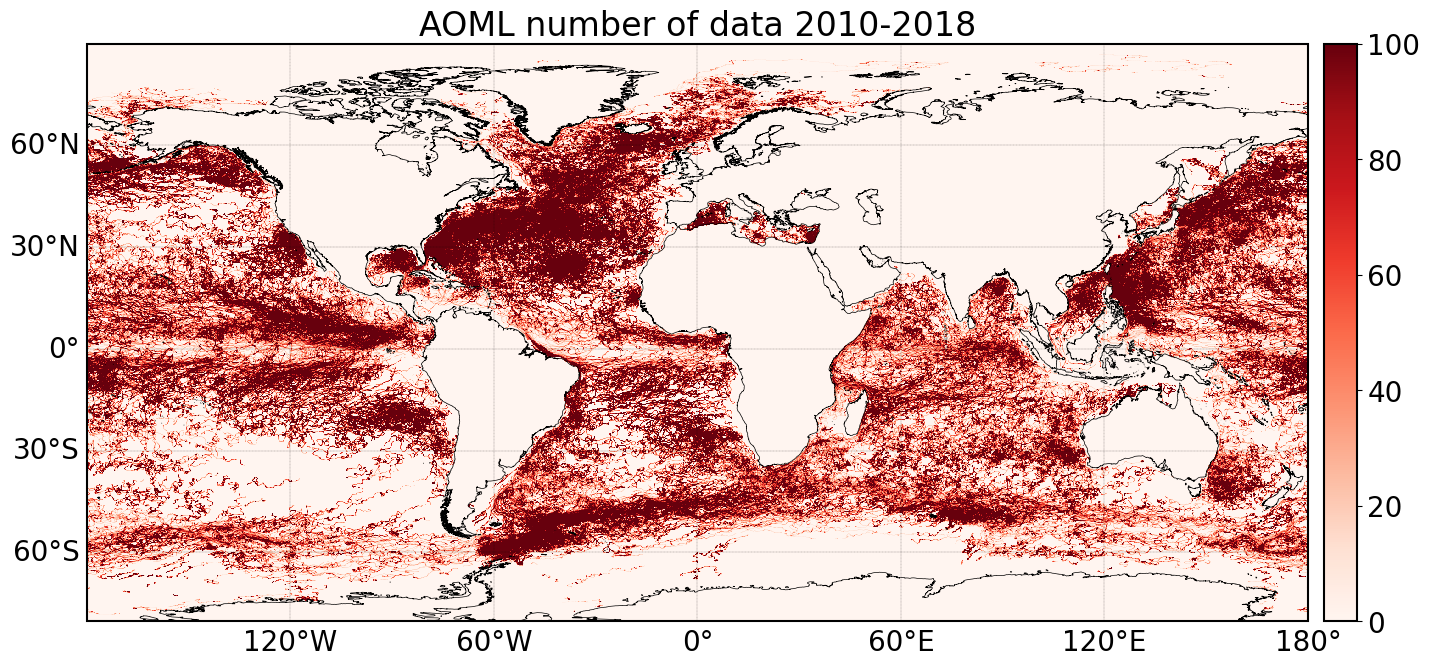

In [17]:
plot_map_zoom(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,cmap=plt.cm.Reds,title="AOML number of data 2010-2018",list_box=None)


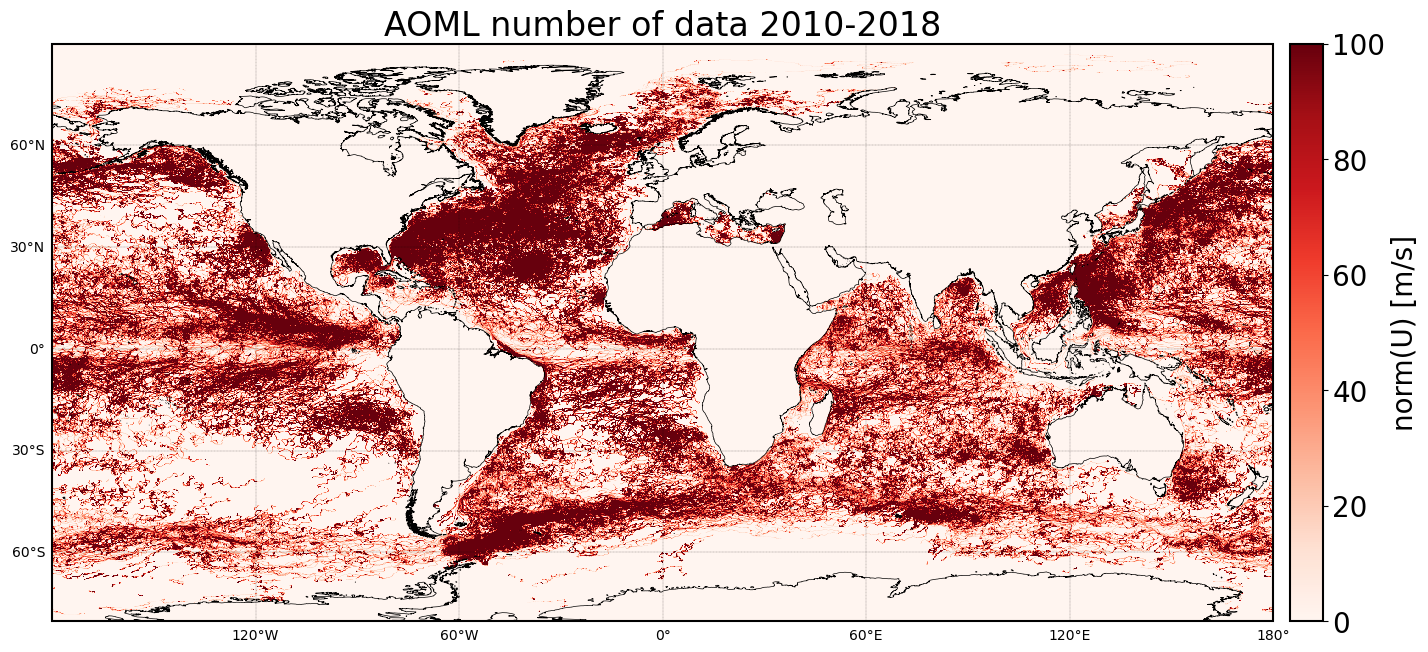

In [15]:
plot_uv_map(histogram_da,histogram_da.lon_bin,histogram_da.lat_bin,vmin=0,vmax=100,cmap=plt.cm.Reds,title="AOML number of data 2010-2018")
#plt.savefig(f"../figures/hist_drifter_aoml_2010-2018.png")
plt.show()